In [1]:
import h5py

import pywt
import wavelets

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from kpnet.cluster import *
from kpnet.handler import *
from kpnet.network import *
from kpnet.signal import *
from kpnet.callback import *
from kpnet.entropy import *

In [2]:
N = 64
time_interval = 2 ** 16
chunk = 2 ** 13

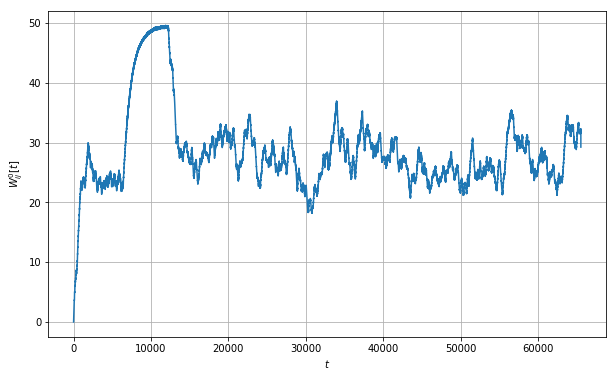

In [3]:
W = h5py.File('data/hfd5/cluster1.hfd5', 'r')['W']

plt.figure(figsize=(10, 6))
plt.plot(W[25, 23])
plt.grid(True)
plt.xlabel(r'$t$')
plt.ylabel(r'$W^{0}_{ij}[t]$')
plt.show()

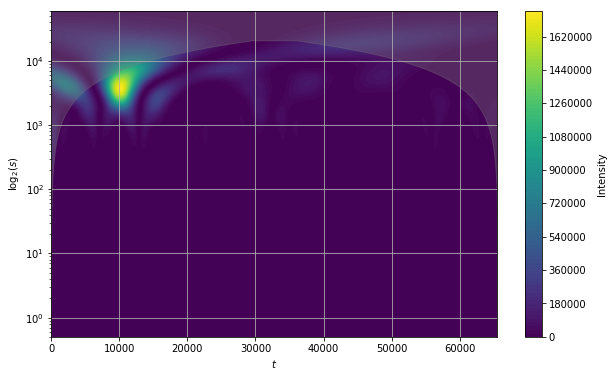

In [4]:
plt.figure(figsize=(10, 6))
wa = wavelets.WaveletAnalysis(W[25, 23], wavelet=wavelets.Ricker())
Time, Scale = np.meshgrid(wa.time, wa.scales)
CS = plt.contourf(Time, Scale, wa.wavelet_power, 100)
coi_time, coi_scale = wa.coi
plt.fill_between(x=coi_time,
                y1=coi_scale,
                y2=wa.scales.max(),
                color='gray',
                alpha=0.3)

plt.colorbar(CS).set_label('Intensity')
plt.xlim(wa.time.min(), wa.time.max())
plt.xlabel('$t$')
plt.yscale('log')
plt.ylabel('$\log_{2}(s)$')
plt.grid(True)
plt.show()

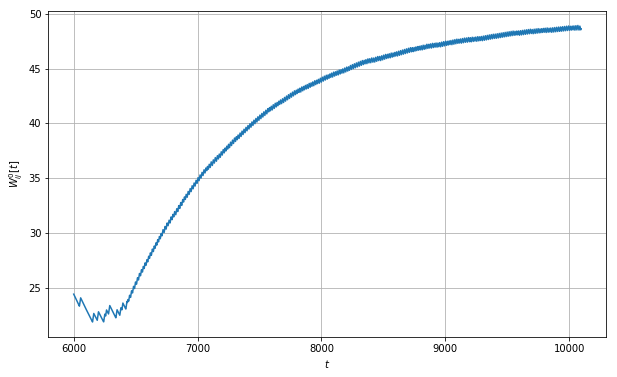

In [5]:
begin = 6000
end   = 10096
pattern = W[25, 23, begin : end]

plt.figure(figsize=(10, 6))
plt.plot(np.arange(begin, end), pattern)
plt.grid(True)
plt.xlabel(r'$t$')
plt.ylabel(r'$W^{0}_{ij}[t]$')
plt.show()

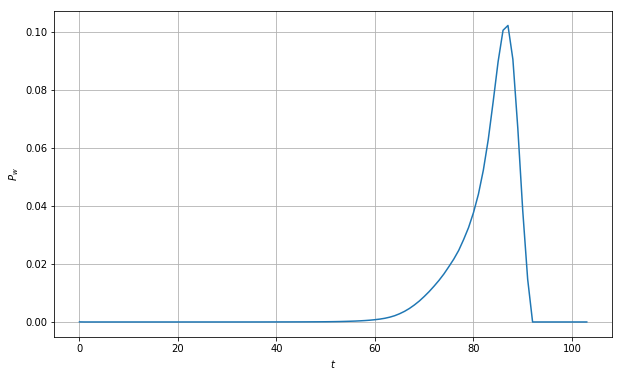

In [6]:
wdist = CWTDistribution(W[25, 23, begin : end], wavelet=wavelets.Ricker())
plt.figure(figsize=(10, 6))
plt.plot(wdist.value)
plt.grid(True)
plt.xlabel(r'$t$')
plt.ylabel(r'$P_{w}$')
plt.show()

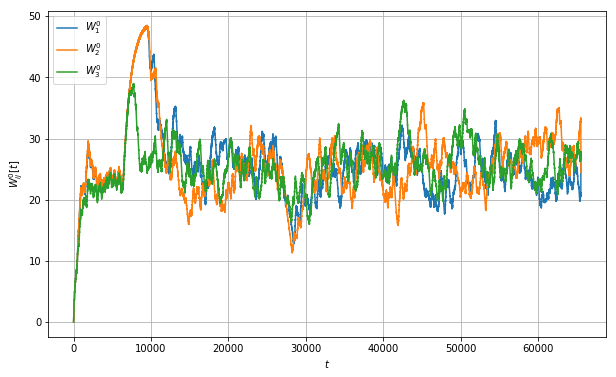

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(W[13, 42], label=r'$W^{0}_{1}$')
plt.plot(W[13, 11], label=r'$W^{0}_{2}$')
plt.plot(W[13, 18], label=r'$W^{0}_{3}$')
plt.grid(True)
plt.xlabel(r'$t$')
plt.ylabel(r'$W^{0}_{ij}[t]$')
plt.legend(loc='upper left')
plt.show()

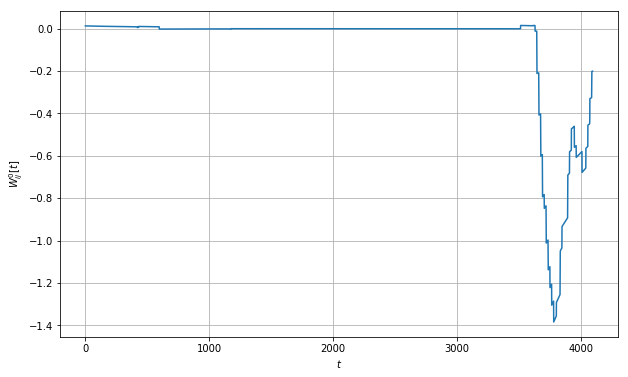

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(W[13, 42][begin:end] - W[13, 34][begin:end], label=r'$W^{0}_{1}$')
plt.grid(True)
plt.xlabel(r'$t$')
plt.ylabel(r'$W^{0}_{ij}[t]$')
plt.show()

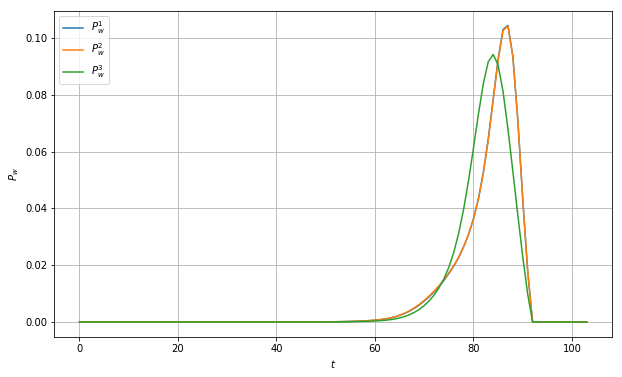

In [9]:
wdist1 = CWTDistribution(W[13, 42, begin : end], wavelet=wavelets.Ricker())
wdist2 = CWTDistribution(W[13, 11, begin : end], wavelet=wavelets.Ricker())
wdist3 = CWTDistribution(W[13, 18, begin : end], wavelet=wavelets.Ricker())

plt.figure(figsize=(10, 6))
plt.plot(wdist1.value, label=r'$P^{1}_{w}$')
plt.plot(wdist2.value, label=r'$P^{2}_{w}$')
plt.plot(wdist3.value, label=r'$P^{3}_{w}$')
plt.grid(True)
plt.xlabel(r'$t$')
plt.ylabel(r'$P_{w}$')
plt.legend(loc='upper left')
plt.show()

In [10]:
print(wdist1.jensen(wdist2))
print(wdist1.jensen(wdist3))

3.64611970405e-05
0.081202555253


In [11]:
wtc = WTClustering(W, pattern, CWTDistribution, wavelets.Ricker())
%time clusters = wtc.run(begin, end, epsilon=0.003, delta=0.005)

CPU times: user 6min 9s, sys: 964 ms, total: 6min 10s
Wall time: 6min 11s


In [12]:
clusters

[[3, 5, 11, 13, 29, 31, 34, 36, 42, 0], [12, 58, 8], [25, 23]]

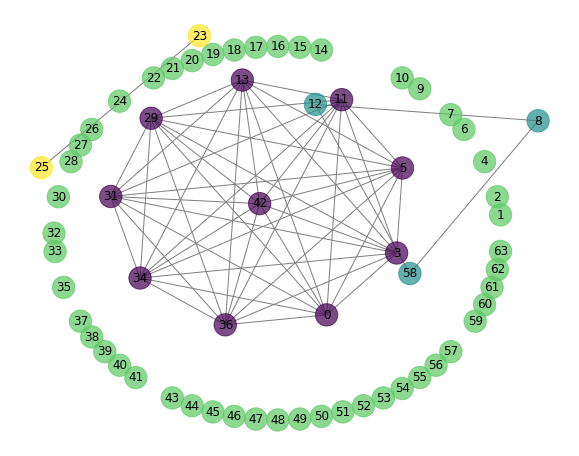

In [13]:
wtc.plot((10, 8))